In [27]:
import anndata as ad 
import squidpy as sq
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [28]:
adata = ad.read_h5ad('/sbgenomics/project-files/HTAPP-313_centroids_celltyped.h5ad')

In [29]:
adata.obs['x_centroid'] = np.max(adata.obs['x_centroid']) - adata.obs['x_centroid']
adata.obs['y_centroid'] = np.max(adata.obs['y_centroid']) - adata.obs['y_centroid']

In [30]:
celltype_map = {
'MBC' : 'Tumor', 
'Fibroblast' : 'Fibrosis',
'Macrophage_Monocyte' : 'Immune',
'Activated Fibroblast' : 'Fibrosis',
'Unknown' : 'Unknown',
'Endothelial' : 'Vascular',
'T' : 'Immune',
'Immune' : 'Immune',
'B cell' : 'Immune',
'Unknown_stem' : 'Unknown',
'Unknown_vasculature' : 'Unknown'
}

adata.obs['cell_type'] = adata.obs.cell_type.map(celltype_map)

In [31]:
adata = adata[adata.obs.cell_type != 'Unknown']

In [ ]:
adata[adata.obs.cell_type == 'Tumor']

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

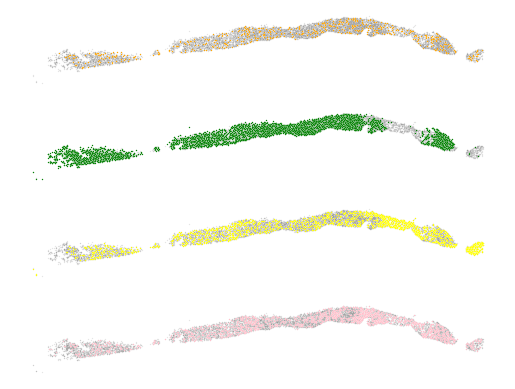

In [42]:
fig,ax = plt.subplots(4)
sns.scatterplot(y = adata.obs.x_centroid, 
                x = adata.obs.y_centroid, 
                color = 'grey',
                alpha = 0.2,
                s = 1, ax = ax[0])
sns.scatterplot(y = adata[adata.obs.cell_type == 'Vascular'].obs.x_centroid, 
                x = adata[adata.obs.cell_type == 'Vascular'].obs.y_centroid, 
                color = 'orange',
                s = 1, ax = ax[0])
sns.scatterplot(y = adata.obs.x_centroid, 
                x = adata.obs.y_centroid, 
                color = 'grey',
                alpha = 0.2,
                s = 1, ax = ax[1])
sns.scatterplot(y = adata[adata.obs.cell_type == 'Tumor'].obs.x_centroid, 
                x = adata[adata.obs.cell_type == 'Tumor'].obs.y_centroid, 
                color = 'green',
                s = 1, ax = ax[1])
sns.scatterplot(y = adata.obs.x_centroid, 
                x = adata.obs.y_centroid, 
                color = 'grey',
                alpha = 0.2,
                s = 1, ax = ax[2])
sns.scatterplot(y = adata[adata.obs.cell_type == 'Fibrosis'].obs.x_centroid, 
                x = adata[adata.obs.cell_type == 'Fibrosis'].obs.y_centroid, 
                color = 'yellow', 
                s = 1, ax = ax[2])
sns.scatterplot(y = adata.obs.x_centroid, 
                x = adata.obs.y_centroid, 
                color = 'grey',
                alpha = 0.2,
                s = 1, ax = ax[3])
sns.scatterplot(y = adata[adata.obs.cell_type == 'Immune'].obs.x_centroid, 
                x = adata[adata.obs.cell_type == 'Immune'].obs.y_centroid, 
                color = 'pink',
                s = 1, ax = ax[3])

ax[0].axis("equal")
ax[0].axis("off")
ax[0].legend().set_visible(False)

ax[1].axis("equal")
ax[1].axis("off")
ax[1].legend().set_visible(False)

ax[2].axis("equal")
ax[2].axis("off")
ax[2].legend().set_visible(False)

ax[3].axis("equal")
ax[3].axis("off")
ax[3].legend().set_visible(False)

plt.savefig('MERFISH_spatial_celltypes.png', dpi = 300)